#第11章 クラスタリングと特徴量の次元削減

##11.2 クラスタリング

図11.1 make_blobsデータセットを表示するプログラム

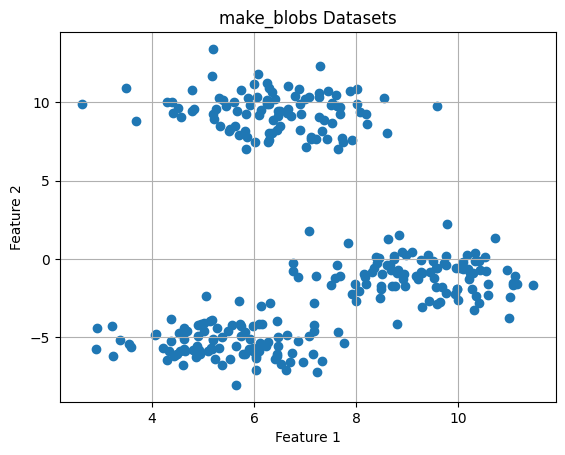

In [1]:
#make_blobsデータセットの例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

# データ生成
n_samples = 300  # サンプル数
n_features = 2   # 特徴量数
n_clusters = 3   # クラスタ数
random_state = 13

X, y_true = make_blobs(n_samples=n_samples,
                       n_features=n_features,
                       centers=n_clusters,
                       cluster_std=1.2,
                       random_state=random_state)

plt.scatter(X[:,0],X[:,1])
plt.title("make_blobs Datasets")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.legend()
plt.grid(True)
plt.show()


図11.2 make_moonsデータセットを表示するプログラム

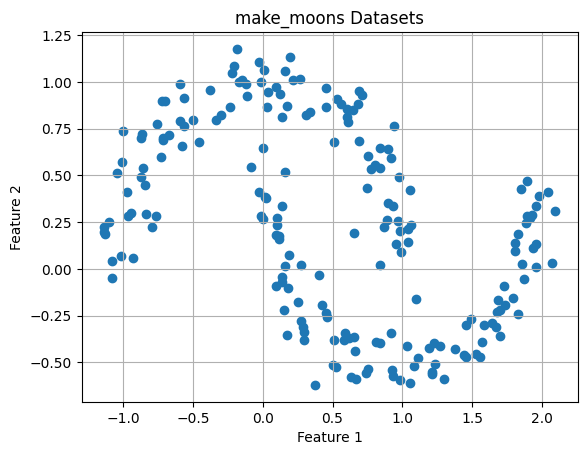

In [2]:
#make_blosデータセットの例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

# データ生成
n_samples = 200  # サンプル数
noise = 0.10      # ノイズの強さ
random_state = 13

X, y = make_moons(
    n_samples=n_samples,
    noise=noise,
    random_state=random_state
)

plt.scatter(X[:,0],X[:,1])
plt.title("make_moons Datasets")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.legend()
plt.grid(True)
plt.show()


###11.3.1 k-meansによるクラスタリング

In [3]:
#グラフに日本語を表示するためのモジュールをインストールする
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c17ac276a7875073faedf0988ce2592c9b80121d3a72b91122ac2bfd57fc8896
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


####図11.3 make_blobsのクラスタリング

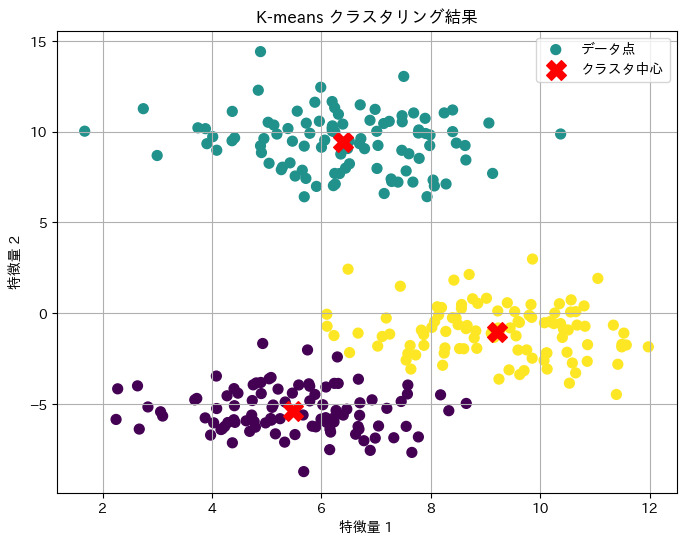

In [4]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=13)

# K-means クラスタリング
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=10) #モデルの指定
model.fit(X)    #モデルの訓練（実施）

# クラスタリング結果
labels = model.labels_
centers = model.cluster_centers_

# 結果の散布図表示
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("K-means クラスタリング結果")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

####図11.4 make_moonsのクラスタリング

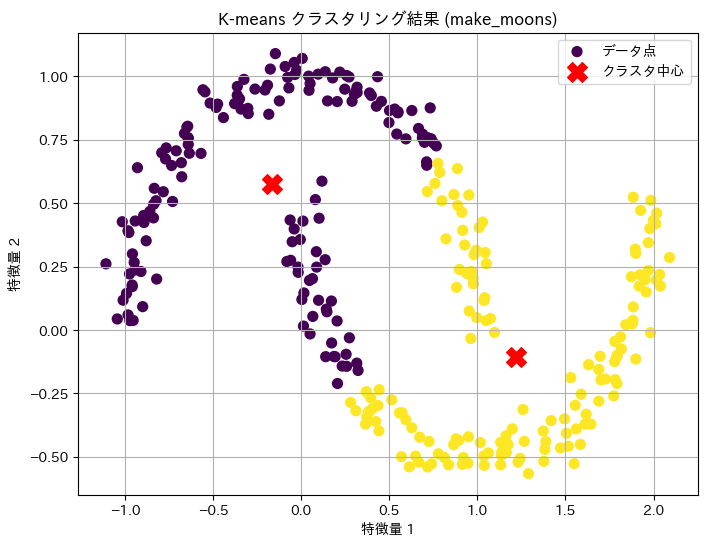

In [5]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.06, random_state=13)

# K-means クラスタリング
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(X)

# クラスタリング結果
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 結果の散布図表示
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("K-means クラスタリング結果 (make_moons)")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

###11.3.2 エルボー法によるクラスタ数の類推

k-meansクラスタリング(2分割)の結果

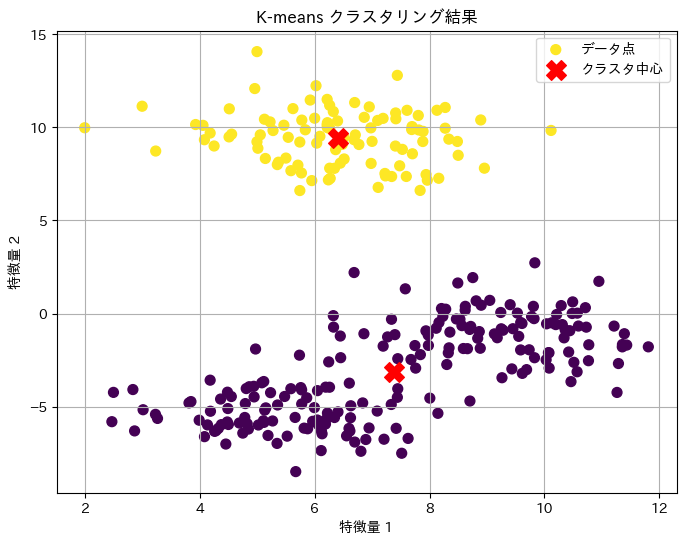

In [6]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# K-means クラスタリング
from sklearn.cluster import KMeans
#クラスタを2つとした場合
model = KMeans(n_clusters=2, random_state=10) #モデルの指定
model.fit(X)    #モデルの訓練（実施）

# クラスタリング結果
labels = model.labels_
centers = model.cluster_centers_

# 結果の散布図表示
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("K-means クラスタリング結果")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

k-meansクラスタリング(3分割)の結果

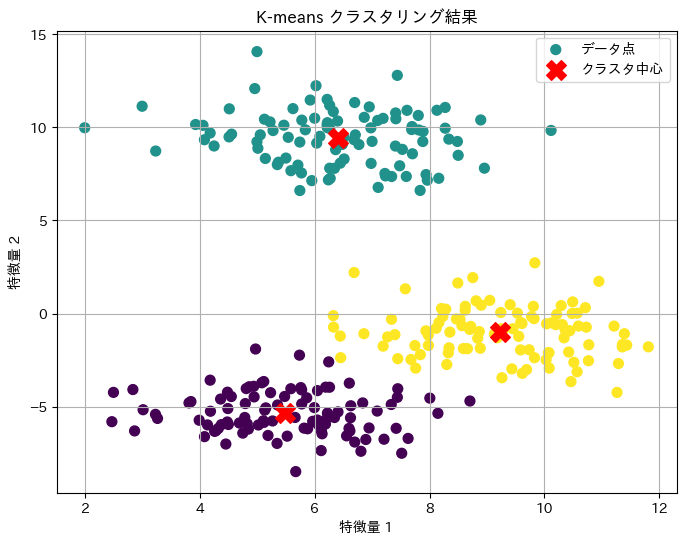

In [7]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# K-means クラスタリング
#クラスタを３つとした場合
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=10) #モデルの指定
model.fit(X)    #モデルの訓練（実施）

# クラスタリング結果
labels = model.labels_
centers = model.cluster_centers_

# 結果の散布図表示
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("K-means クラスタリング結果")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

####図11.5 k-meansクラスタリング(4分割)結果

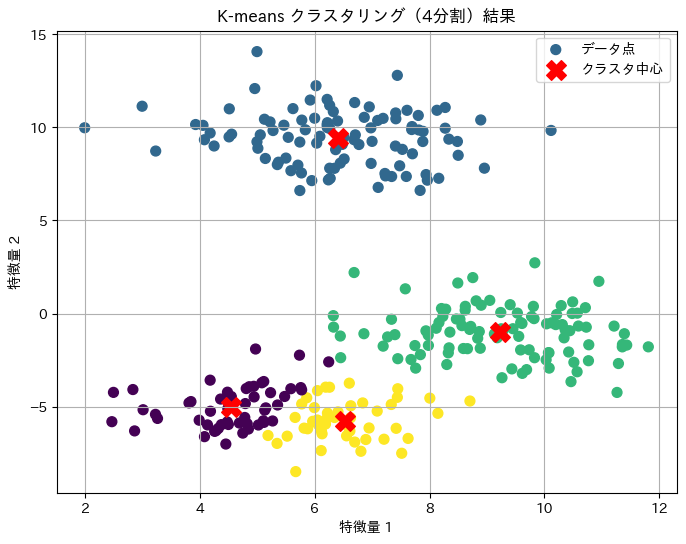

In [8]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# K-means クラスタリング
from sklearn.cluster import KMeans
#クラスタを４つとした場合
model = KMeans(n_clusters=4, random_state=10) #モデルの指定
model.fit(X)    #モデルの訓練（実施）

# クラスタリング結果
labels = model.labels_
centers = model.cluster_centers_

# 結果の散布図表示
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("K-means クラスタリング（4分割）結果")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

####図11.6 エルボー法で最適なクラスタ数の決定

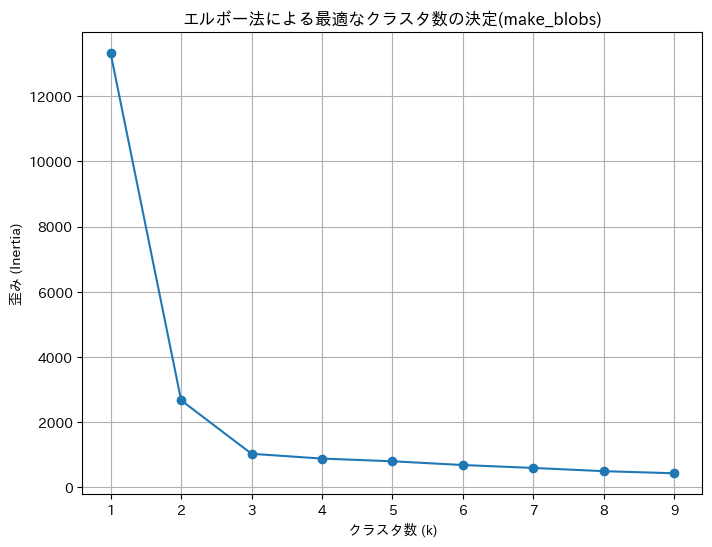

In [9]:
import numpy as np
import pandas as pd

#エルボー法でクラスタ数を類推する
# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# クラスタ数を1から9まで変更し K-means を適用
inertia = []
k_range = range(1, 10)

from sklearn.cluster import KMeans
for k in k_range:
    model = KMeans(n_clusters=k, random_state=13)
    model.fit(X)
    inertia.append(model.inertia_)

# エルボー法のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker="o")
plt.title("エルボー法による最適なクラスタ数の決定(make_blobs)")
plt.xlabel("クラスタ数 (k)")
plt.ylabel("歪み (Inertia)")
plt.grid(True)
plt.show()
plt.close()

####図11.7　エルボー法による最適なクラスタ数の決定（make_mooms）

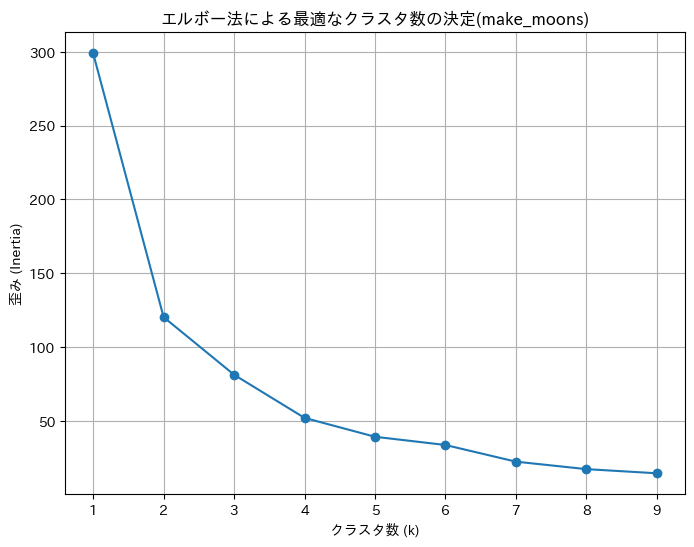

In [10]:
import numpy as np
import pandas as pd

#エルボー法でクラスタ数を類推する
# データ生成
from sklearn.datasets import make_blobs
X, _ = make_moons(n_samples=300, noise=0.05, random_state=13)

# クラスタ数を変えて K-means を適用
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=13)
    model.fit(X)
    inertia.append(model.inertia_)

# エルボー法のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker="o")
plt.title("エルボー法による最適なクラスタ数の決定(make_moons)")
plt.xlabel("クラスタ数 (k)")
plt.ylabel("歪み (Inertia)")
plt.grid(True)
plt.show()


####図11.8 make_blobsのクラスタ数に対するシルエットスコア

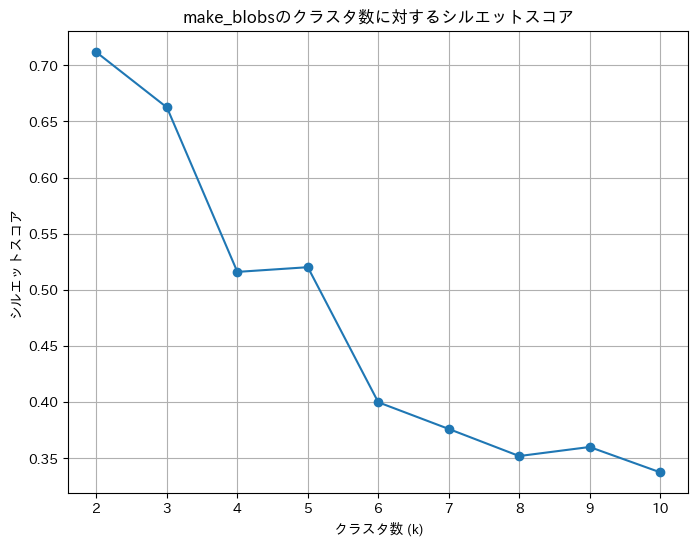

In [11]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# クラスタ数を変化させたときのシルエットスコアを格納するリスト
silhouette_scores = []
k_range = range(2, 11)  # クラスタ数を2から10に設定

#クラスタリングしてシルエットスコアの計算
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in k_range:
    model = KMeans(n_clusters=k, random_state=13)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# グラフのプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker="o")
plt.title("make_blobsのクラスタ数に対するシルエットスコア")
plt.xlabel("クラスタ数 (k)")
plt.ylabel("シルエットスコア")
plt.xticks(k_range)
plt.grid(True)
plt.show()
plt.close()


####図11.9 make_moonsのクラスタ数に対するシルエットスコア

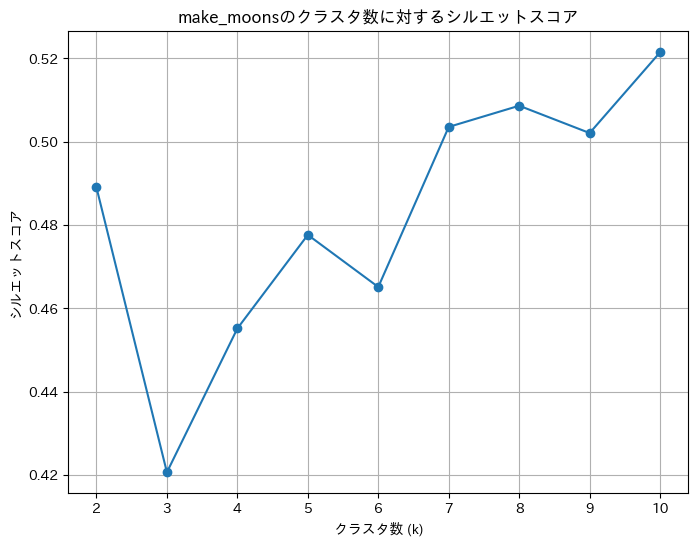

In [12]:
import numpy as np

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_moons(n_samples=300, noise=0.05, random_state=13)

# クラスタ数を変化させたときのシルエットスコアを格納するリスト
silhouette_scores = []
k_range = range(2, 11)  # クラスタ数を2から10に設定

#クラスタリングしてシルエットスコアの計算
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in k_range:
    model = KMeans(n_clusters=k, random_state=13)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# グラフのプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker="o")
plt.title("make_moonsのクラスタ数に対するシルエットスコア")
plt.xlabel("クラスタ数 (k)")
plt.ylabel("シルエットスコア")
plt.xticks(k_range)
plt.grid(True)
plt.show()
plt.close()


##11.4 GMMとV-GMMによるクラスタリング

####図11.10 GMMクラスタリング結果

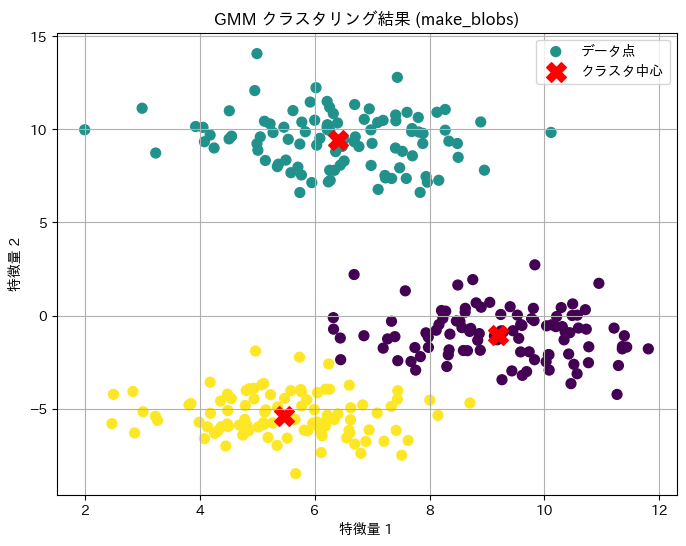

In [13]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# GMMによるクラスタリング
from sklearn.mixture import GaussianMixture
#クラスタ数は3と設定
model = GaussianMixture(n_components=3, random_state=13)
model.fit(X)
labels = model.predict(X)
centers = model.means_  #各クラスタの平均値

# クラスタリング結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("GMM クラスタリング結果 (make_blobs)")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()


####図11.11　GMMクラスタリング結果（make_moons）

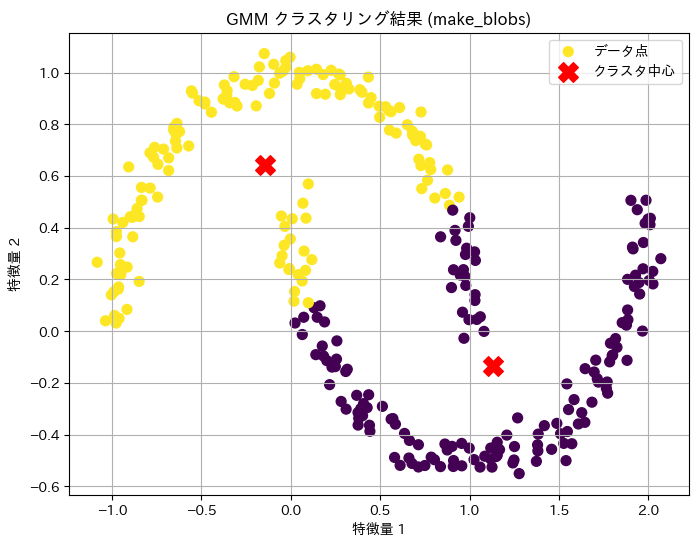

In [14]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.05, random_state=13)

# GMMでクラスタリング
from sklearn.mixture import GaussianMixture
#クラスタ数２と設定
model = GaussianMixture(n_components=2, random_state=13)
model.fit(X)
labels = model.predict(X)
centers = model.means_  #各クラスタの平均値

# クラスタリング結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, label="データ点")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="クラスタ中心")
plt.title("GMM クラスタリング結果 (make_blobs)")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()


####図11.12 V-GMMクラスタリング結果（make_blobs）

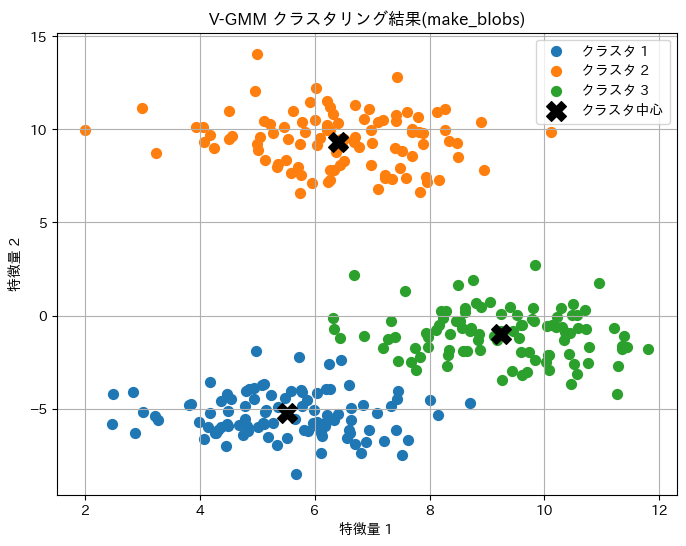

In [15]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# V-GMM モデルの作成
from sklearn.mixture import BayesianGaussianMixture
model = BayesianGaussianMixture(n_components=10, covariance_type="full", random_state=13)
model.fit(X)

# クラスタリング結果
labels = model.predict(X)
centers = model.means_

# クラスタリング結果
labels = model.predict(X)
centers = model.means_

# ラベル番号を連続化
unique_labels = np.unique(labels)
label_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
new_labels = np.array([label_map[label] for label in labels])
# centers を連続ラベル順に並べ替え
new_centers = np.array([centers[label] for label in unique_labels])

# 結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
#クラスタごとにプロット
for label in np.unique(new_labels):
    plt.scatter(X[new_labels == label, 0], X[new_labels == label, 1],
                s=50, label=f"クラスタ {label + 1}")

# クラスタ中心の表示
plt.scatter(new_centers[:, 0], new_centers[:, 1],
    s=200, marker="X", color="black", label="クラスタ中心")

plt.title("V-GMM クラスタリング結果(make_blobs)")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()


####図11.13 V-GMMでクラスタ自動推定による結果（make_moons）

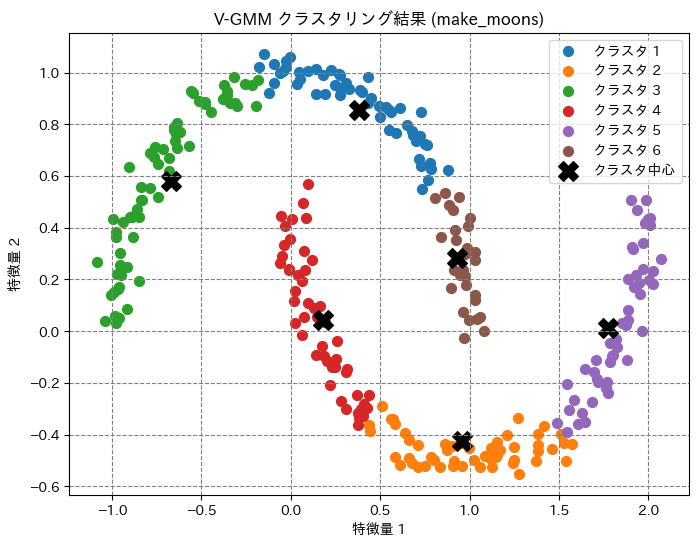

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.mixture import BayesianGaussianMixture
import japanize_matplotlib

# データ生成
X, _ = make_moons(n_samples=300, noise=0.05, random_state=13)

# V-GMM モデルの作成
model = BayesianGaussianMixture(n_components=10, random_state=10)
model.fit(X)

# クラスタリング結果
labels = model.predict(X)
centers = model.means_

# ラベル番号を連続化
unique_labels = np.unique(labels)
label_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
new_labels = np.array([label_map[label] for label in labels])
# centers を連続ラベル順に並べ替え
new_centers = np.array([centers[label] for label in unique_labels])


# 結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))

#クラスタごとにプロット
for label in np.unique(new_labels):
    plt.scatter(X[new_labels == label, 0], X[new_labels == label, 1],
        s=50, label=f"クラスタ {label + 1}")

# クラスタ中心の表示
plt.scatter(new_centers[:, 0], new_centers[:, 1],
    s=200, marker="X", color="black", label="クラスタ中心")

plt.title("V-GMM クラスタリング結果 (make_moons)")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True, linestyle="--", color="gray")
plt.show()


##11.5 DBSCANによるクラスタリング

####図11.14 DBSCANクラスタリング結果（eps=0.5，min_smples=5）

外れ値と判断されたデータ数99


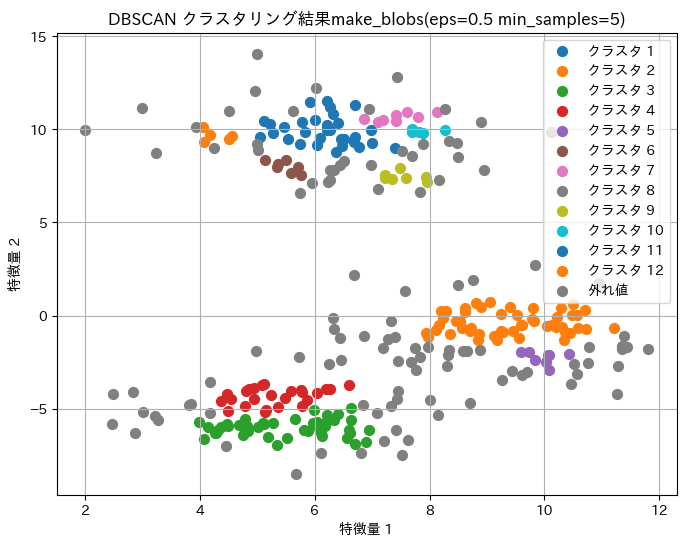

In [17]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# DBSCANによるクラスタリング
from sklearn.cluster import DBSCAN
eps=0.5
ms=5
model = DBSCAN(eps=eps, min_samples=ms)
labels = model.fit_predict(X)

#外れ値の数をカウント
num_outliers = np.count_nonzero(labels == -1)
print(f"外れ値と判断されたデータ数{num_outliers}")

# クラスタリング結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # 外れ値
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c="gray", s=50, label="外れ値")
    else:  # クラスタ
        plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, label=f"クラスタ {label + 1}")

plt.title(f"DBSCAN クラスタリング結果make_blobs(eps={eps} min_samples={ms})")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()


####11.15　DBSCANクラスタリング結果（eps=1，min_smples=10）

外れ値と判断されたデータ数28


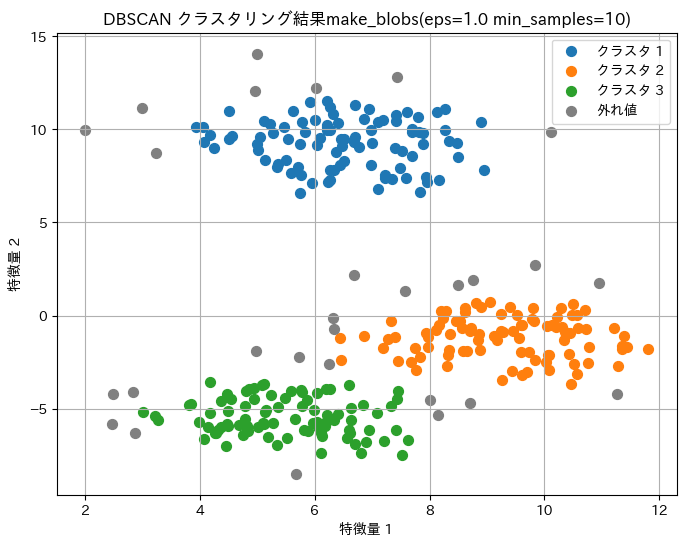

In [18]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.4, random_state=13)

# DBSCANによるクラスタリング
from sklearn.cluster import DBSCAN
eps=1.0
ms=10
model = DBSCAN(eps=eps, min_samples=ms)
labels = model.fit_predict(X)

#外れ値の数をカウント
num_outliers = np.count_nonzero(labels == -1)
print(f"外れ値と判断されたデータ数{num_outliers}")

# クラスタリング結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # 外れ値
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c="gray", s=50, label="外れ値")
    else:  # クラスタ
        plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, label=f"クラスタ {label + 1}")

plt.title(f"DBSCAN クラスタリング結果make_blobs(eps={eps} min_samples={ms})")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()


####図11.16　DBSCANクラスタリング結果（eps=0.3，min_smples=5）

外れ値と判断されたデータ数0


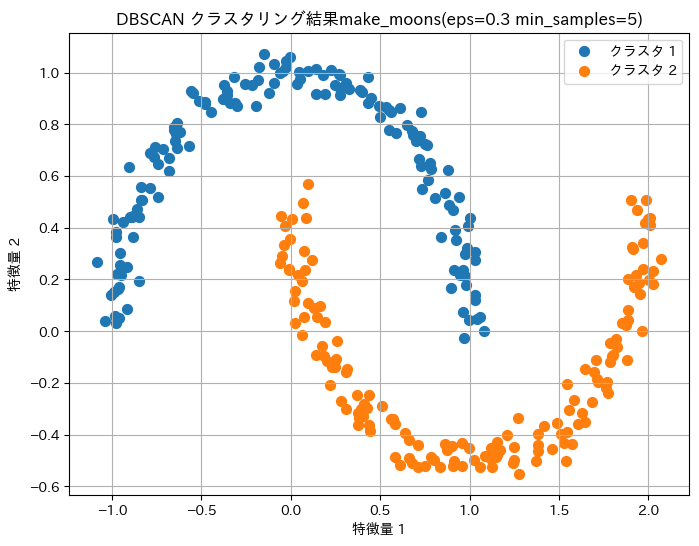

In [19]:
import numpy as np
import pandas as pd

# データ生成
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.05, random_state=13)

# DBSCAN クラスタリング
from sklearn.cluster import DBSCAN
eps=0.3
ms = 5
model = DBSCAN(eps=eps, min_samples=ms)
labels = model.fit_predict(X)

#外れ値の数をカウント
num_outliers = np.count_nonzero(labels == -1)
print(f"外れ値と判断されたデータ数{num_outliers}")

# クラスタリング結果のプロット
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

#クラスタごとにプロット
for label in unique_labels:
    if label == -1:  # 外れ値
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
            s=50, label="外れ値")
    else:  # クラスタ
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
            s=50, label=f"クラスタ {label + 1}")

# グラフの設定
plt.title(f"DBSCAN クラスタリング結果make_moons(eps={eps} min_samples={ms})")
plt.xlabel("特徴量 1")
plt.ylabel("特徴量 2")
plt.legend()
plt.grid(True)
plt.show()
plt.close()


##11.6 特徴量の次元削減

###11.6.1 PCA（Principal Component Analysis、主成分分析）

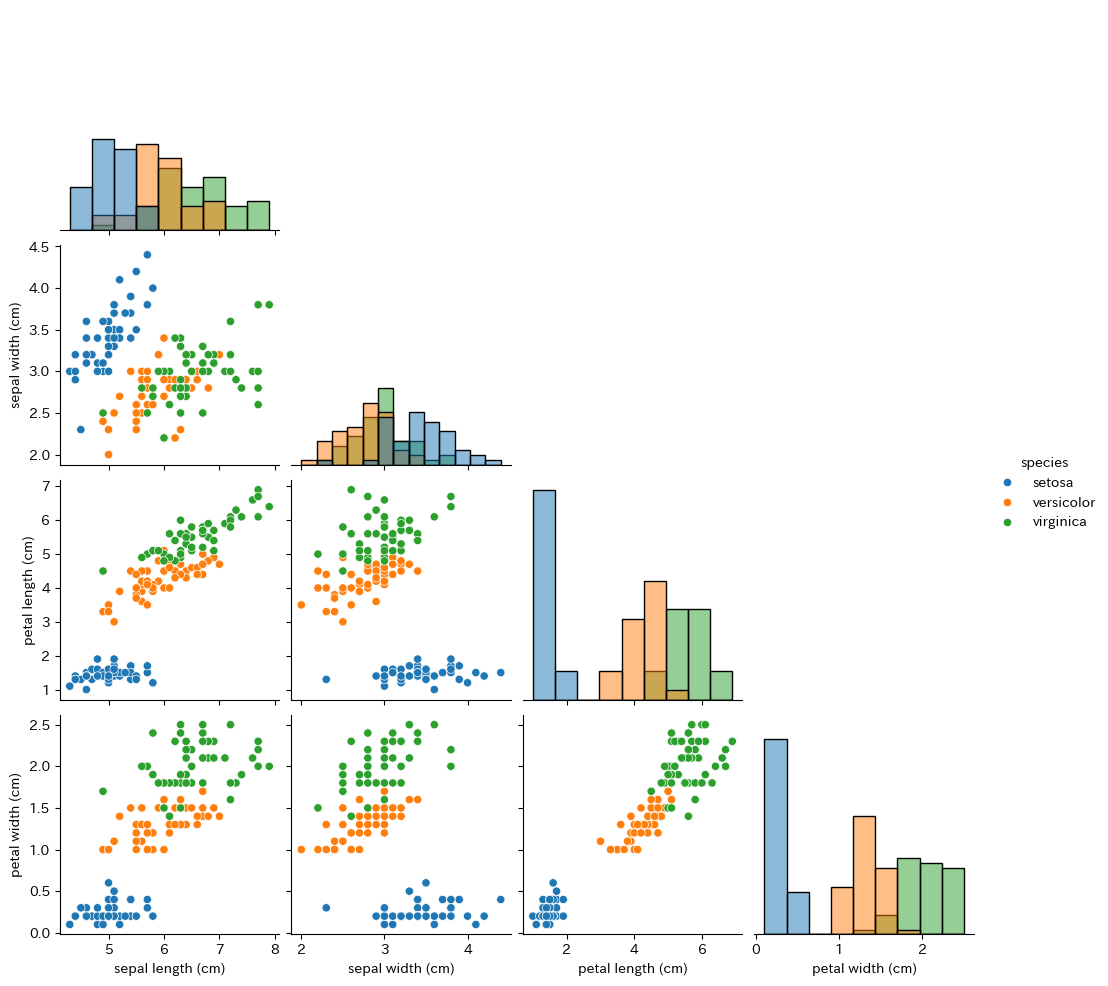

In [20]:
import numpy as np
import pandas as pd

# データセットのロード
from sklearn.datasets import load_iris
iris = load_iris()

# 特徴量データフレームに変換
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X["species"] = pd.Series(iris.target).map({0: "setosa", 1: "versicolor", 2: "virginica"})

# ペアプロットの作成（hueにクラス名を指定）
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
sns.pairplot(X,hue="species", diag_kind="hist", corner=True)
plt.show()
plt.close()

主成分分析プログラム

固有値（各主成分の分散）:
[4.22824171 0.24267075]

寄与率（各主成分が説明する分散の割合）:
[0.92461872 0.05306648]

累積寄与率:
[0.92461872 0.97768521]

固有ベクトル（各主成分の係数）:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


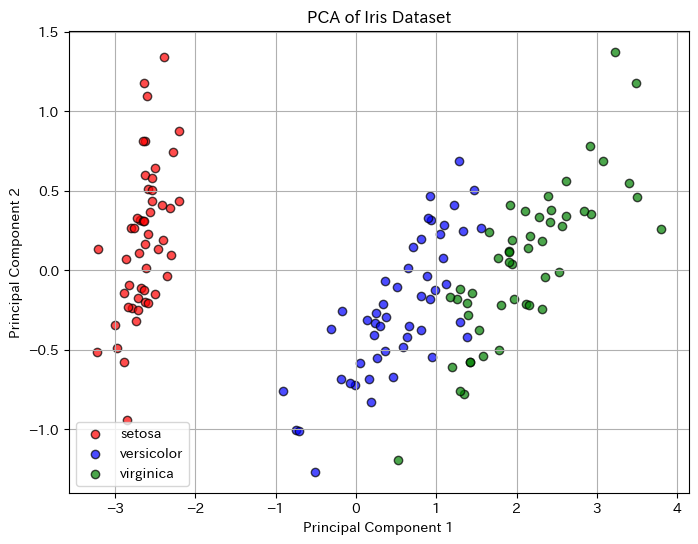

In [21]:
import numpy as np
import pandas as pd

# データセットのロード
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル
target_names = iris.target_names

# PCAによる次元削減
from sklearn.decomposition import PCA
model = PCA(n_components=2)  # 全ての主成分を計算
X_pca = model.fit_transform(X)

# 固有値（各主成分が説明する分散の量）
eigenvalues = model.explained_variance_
print("固有値（各主成分の分散）:")
print(eigenvalues)

# 累積寄与率
explained_variance_ratio = model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\n寄与率（各主成分が説明する分散の割合）:")
print(explained_variance_ratio)
print("\n累積寄与率:")
print(cumulative_explained_variance)

# 固有ベクトル（主成分の方向）
eigenvectors = model.components_
print("\n固有ベクトル（各主成分の係数）:")
print(eigenvectors)

# 次元削減後の可視化
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
colors = ["red", "blue", "green"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=target_name, alpha=0.7, edgecolors="k")

plt.legend()
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()
plt.close()



###11.6.2 t-SNEによる次元削減

####データの形状

データの形状: (1797, 64)
ターゲットのラベル: [0 1 2 3 4 5 6 7 8 9]


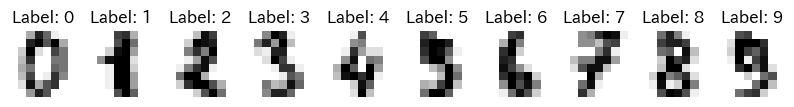

In [22]:
import numpy as pd
import pandas as pd

# データセットのロード
from sklearn.datasets import load_digits
digits = load_digits()

# データの基本情報
print("データの形状:", digits.data.shape)
print("ターゲットのラベル:", digits.target_names)

# 画像データの可視化
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:10], digits.target[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.show()
plt.close()

####図11.19 エルボー法による次元数選択

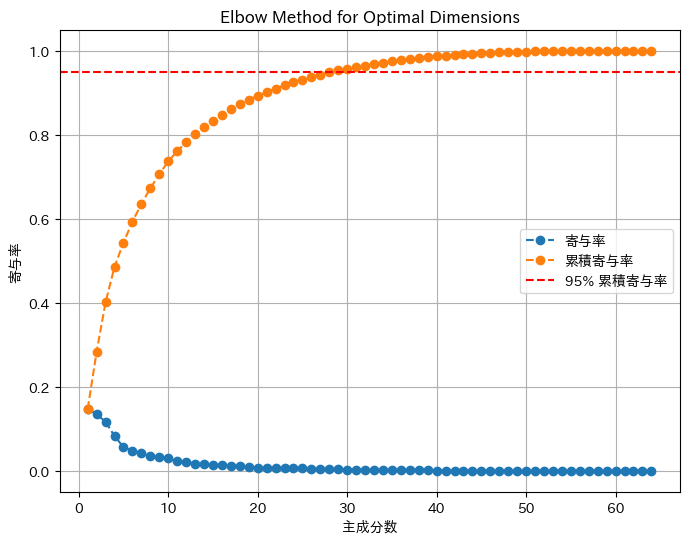

95%の累積寄与率を達成するための次元数: 29
次元削減後のデータの形状: (1797, 29)


In [23]:
import numpy as np
import pandas as pd




# データセットのロード
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data  # 特徴量データ
y = digits.target  # ラベル

# PCAの適用
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# 固有値（説明分散）と累積寄与率の計算
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# エルボー法による可視化
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker="o", linestyle="--",label="寄与率")
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker="o", linestyle="--",label="累積寄与率")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% 累積寄与率")
plt.title("Elbow Method for Optimal Dimensions")
plt.xlabel("主成分数")
plt.ylabel("寄与率")
plt.legend()
plt.grid()
plt.show()

# 次元数の選択（例: 累積寄与率95%を基準）
optimal_dims = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"95%の累積寄与率を達成するための次元数: {optimal_dims}")

# 選択した次元数でPCAを適用
pca_optimal = PCA(n_components=optimal_dims)
X_reduced = pca_optimal.fit_transform(X)

print(f"次元削減後のデータの形状: {X_reduced.shape}")



####図11.20 PCA of Digits Dataset

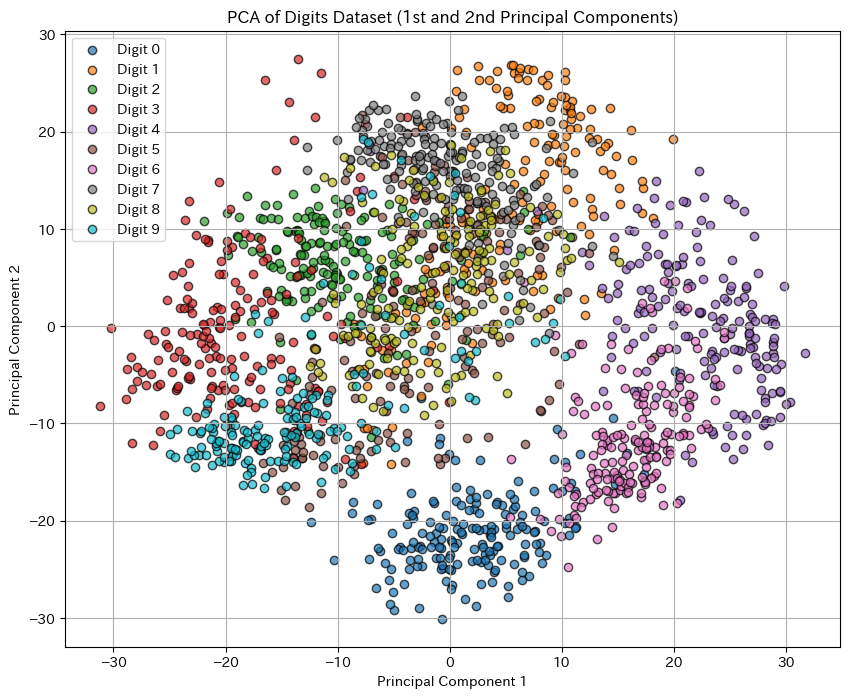

In [24]:
import numpy as np

# データセットのロード
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data  # 特徴量データ
y = digits.target  # ラベル（0〜9の数字）

# PCAで次元削減（2次元に）
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 第1主成分と第2主成分の散布図の作成
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# "tab10"カラーマップを使って10色のカラーパレットを取得
colors = plt.colormaps["tab10"]

for i in range(10):  # 0〜9のラベルごとに色分け
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors(i), label=f"Digit {i}", alpha=0.7, edgecolors="k")

plt.title("PCA of Digits Dataset (1st and 2nd Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


####t-SNEでload_digitsデータを次元削減

KL:0.6708


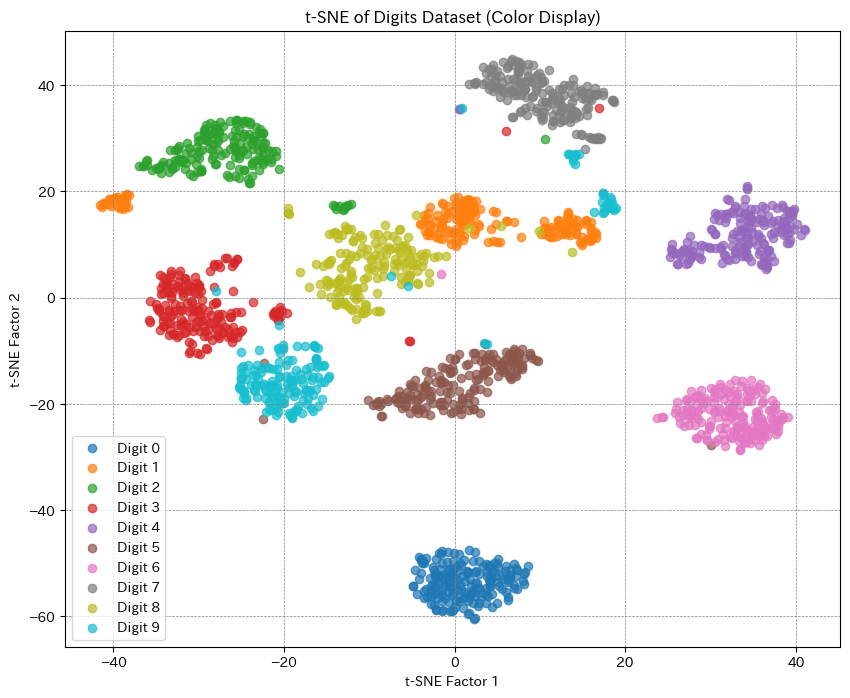

In [25]:
import numpy as np
import pandas as pd

# データセットのロード
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data  # 特徴量データ
y = digits.target  # ラベル（0〜9の数字）

# t-SNEによる次元削減
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=13, perplexity=50, max_iter=2000)
X_tsne = model.fit_transform(X)
print(f"KL:{model.kl_divergence_ :.4f}")

# 散布図の作成（ラベルごとに区別）
plt.figure(figsize=(10, 8))

# カラーマップの設定（カラーで表示）
import matplotlib.pyplot as plt

colors = plt.cm.tab10  # "tab10"カラーマップを使用
for i in range(10):  # ラベルごとにプロット
    plt.scatter(
        X_tsne[y == i, 0], X_tsne[y == i, 1],
        label=f"Digit {i}", alpha=0.7, color=colors(i / 10)
    )

# グラフの設定
plt.title("t-SNE of Digits Dataset (Color Display)")
plt.xlabel("t-SNE Factor 1")
plt.ylabel("t-SNE Factor 2")
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()
